# Implementation of a Dense Neural Networks with multiple layers and nodes for binary classification using numpy (Deep Learning)

## Table of Contents
* [1. Deep Neural Networks](#Deep_neural)
* [2. Forward Propagation](#Forward_prop)
* [3. Back Propagation with Gradient Descent](#Back_prop)
* [4. Activation Functions](#Act_fun)
* [5. Python Class Implementation](#python_class)
    * [5.1. Data Structure (Dictionary) definitions](#python_class1)
    * [5.2. Member Functions](#python_class2)
    * [5.3. Code Listing](#python_class3)

## 1. Deep Neural Networks <a class="anchor" id="Deep_neural"></a>

The following notebook describes the implementation of a deep neural network for binary classification task using numpy library and python dictionaries. Deep Learning has revolutionized the field of machine learning in recent times with applications in the area of Computer Vision, Natual Language Processing, Sequence modeling etc. Neural networks are expensive to train due to the number of parameters involved.

   A dense neural network is one of the most generic type of neural networks with all the nodes from one layer connected to all the nodes in the next layer and so on. Dense neural networks are well suited for non linear problems due to the non-linear nature of the activation functions used and dense connections between nodes. The figure below shows a dense deep neural network with 3 layers and many nodes in each layer.

<img src="./Dense_Neural_Network.JPG" style="width:850px;height:400px;">
<p>

$X$ is the input feature matrix and $y_{true}$ is the true training label vector (0 or 1). 

   
$$X=\begin{bmatrix}
    x_{1,1} & x_{1,2} & ....\\
    x_{2,1} & x_{2,2} & ....\\
    ....                    \\
    . & ....                    \\
    . & ....                    \\
    x_{m,1} & .... & x_{m,n_0}\\
    \end{bmatrix}$$
    

 $$ y = \begin {bmatrix}
          1 \\
          0 \\
          .     \\
          .     \\
          1 \\
         \end{bmatrix} $$

Here the feature matrix X is of dimension $(m,n_0)$ and the output label y is a 1D array of dimension $(m,1)$

$W's$ are the network weight matrices and $b's$ are the bias terms. In this implementation the bias is a vector instead of a single number for each layer. $Z$ represents the linear transformation of the input data and $A$ is the activation function applied to the linear transformation. The activation functions implemented in this investigation are Sigmoid, Rectified Linear Unit(RELU), Leaky RELU and tanh. Since this is a binary classification task, the final node always uses the sigmoid activation function whose output varies between zero and 1 - which then can be used for predicting the binary class labels. The values of the elements in the weight matrices and bias vectors need to be fit for making accurate predictions based on the training set. A loss function is defined and minimization of the loss function using gradient descent optimization algorithm is performed. The loss function is give as follows,

$$ Loss_i = - y^{i}_{true} . \log(\sigma(Z^{i,L})) - (1-y^{i}_{true}) . \log(1-\sigma(Z^{i,L})) $$

which is called the cross-entropy loss function (named after entropy-temperature-pressure relationship from Thermodynamics). This represents loss or error for a single training example. The objective function for gradient descent needs to consider all of the training set to best fit the weights. So, an average loss is calculated over the training set as shown below which  is called the cost function.

$$ Cost  J = -\frac{1}{m}\sum_{i=1}^{m}y^{i}_{true} . \log(\sigma(Z^{i,L})) + (1-y^{i}_{true}) . \log(1-\sigma(Z^{i,L}))$$

## 2. Forward Propagation <a class="anchor" id="Forward_prop"></a>

Transforming the input features, as we move from left to right all the way to the final node is called the forward propagation. The forward pass is a series of matrix operations dependent upon the structure of the neural network. 

The feature transformation in the forward pass is as follows.

$$Layer_1 \,\,\,\, Z^1 = W_1.X^T + b_1,\, A^1 = G(Z^1)$$

$$Layer_2 \,\,\,\, Z^2 = W_2.A^1 + b_2,\, A^2 = G(Z^2)$$

$$Layer_3 \,\,\,\, Z^3 = W_3.A^2 + b_3,\, A^3 = G(Z^3)$$

$$.....$$

$$.....$$

$$Layer_L \,\,\,\, Z^L = W_L.A^{L-1} + b_L,\, A^L = G(Z^L)$$

where 

$\begin{equation*}
W_1 =\begin{bmatrix}
W^{1,1}_1 & W^{1,2}_1 & ... W^{1,n_0}_1\\
W^{2,1}_1 & W^{2,2}_1 & ....\\
....                    \\
....                    \\
....                    \\
W^{n_1,1}_1 & .... & W^{n_1,n_0}_1\\
\end{bmatrix},
b_1 = \begin{bmatrix}
b^1_1\\
b^2_1\\
.\\
.\\
b^{n_1}_1\\
\end{bmatrix},
W_2 = \begin{bmatrix}
W^{1,1}_2 & W^{1,2}_2 & ... W^{1,n_1}_2\\
W^{2,1}_2 & W^{2,2}_2 & ....\\
....                    \\
....                    \\
....                    \\
W^{n_2,1}_2 & .... & W^{n_2,n_1}_2\\
\end{bmatrix},
b_2 = \begin{bmatrix}
b^1_2\\
b^2_2\\
.\\
.\\
b^{n_2}_2\\
\end{bmatrix},....
W_L = \begin{bmatrix}
W^{1,1}_L & W^{1,2}_L & ... W^{1,n_{L-1}}_L\\
W^{2,1}_L & W^{2,2}_L & ....\\
....                    \\
....                    \\
....                    \\
W^{n_L,1}_L & .... & W^{n_L,n_{L-1}}_L\\
\end{bmatrix},
b_L = \begin{bmatrix}
b^1_L\\
b^2_L\\
.\\
.\\
b^{n_L}_L\\
\end{bmatrix}
\end{equation*}$

Here L is the number of layers in the neural network, G represents the activation function of each layer. The zeroth layer of the neural network is the feature matrix. The dot in the above equations represent matrix multiplication. In the above figure $n_{0}$ represents the number of features in the $X$ matrix and $m$ is the number of training examples. THe weight matrix in the first layer $W_{1}$ is of size $(n_1,n_0)$ and feature matrix X is of size $(m,n_0)$. So feature matrix need to be transposed before performing the dot product. The resulting $Z^1$ is of size $(n_1,m)$. The activation matrix $A^1$ is calculated by applying the activation function to each element of the $Z^1$ matrix so it has the same dimensions. For the next layer the linear combination matrix $Z^2$ is calculated using $A^1$, weight matrix $W_2$ and the bias vector $b_2$. The activation matrix $A^2$ is calculated by using the activation function for the layer. This transformation again changes the dimensions and the value of incoming data. This process is continued until the last layer with the prediction of the probability of binary class label using the sigmoid activation function. 

## 3. Back Propagation with Gradient Descent <a class="anchor" id="Back_prop"></a>

At the end of the forward pass, the loss function is calculated for each training sample. This process is repeated for all m training examples and an overall cost function which is an average of all the losses is estimated. What values of the weights and biases which reduces this cost function is the optimization problem embodied in back propagation. Gradient descent algorithm has been used in this implementation to calculate the weights and bias arrays for each layer. The gradient of the cost function with respect to each weight and bias term in each layer is calculated and the weight and bias matrices are updated based on these gradients.

$$ \frac {\partial J}{\partial W^{j,k}_i} = \frac{1}{m} \sum_{i=1}^{m} Loss_i(y_{true},y_{p})$$
$$ \frac {\partial J}{\partial b^{j}_i} = \frac{1}{m} \sum_{i=1}^{m} Loss_i(y_{true},y_{p})$$

In matrix form this can be represented as follows starting from the last layer L. Back propagation operation is performed  starting from the last layer sequentially moving to the first layer.

$$\begin{equation*}
\frac {\partial J}{\partial W_L} =\begin{bmatrix}
\frac {\partial J}{\partial W^{1,1}_L} & \frac {\partial J}{\partial W^{1,2}_L} & ... \frac {\partial J}{\partial W^{1,n_{L-1}}_L}\\
\frac {\partial J}{\partial W^{2,1}_L} & \frac {\partial J}{\partial W^{2,2}_L} & ... \frac {\partial J}{\partial W^{2,{L-1}}_L}\\
....                    \\
....                    \\
....                    \\
\frac {\partial J}{\partial W^{n_L,1}_L} & \frac {\partial J}{\partial W^{n_L,2}_L} & ... \frac {\partial J}{\partial W^{n_L,n_{L-1}}_L}\\
\end{bmatrix},
\frac {\partial J}{\partial b_L} = \begin{bmatrix}
\frac {\partial J}{\partial b^{1}_L}\\
\frac {\partial J}{\partial b^{2}_L}\\
.\\
.\\
\frac {\partial J}{\partial b^{n_L}_L}\\
\end{bmatrix},
\frac {\partial J}{\partial W_{L-1}} =\begin{bmatrix}
\frac {\partial J}{\partial W^{1,1}_{L-1}} & \frac {\partial J}{\partial W^{1,2}_{L-1}} & ... \frac {\partial J}{\partial W^{1,n_{L-2}}_{L-1}}\\
\frac {\partial J}{\partial W^{2,1}_{L-1}} & \frac {\partial J}{\partial W^{2,2}_{L-1}} & ... \frac {\partial J}{\partial W^{2,{L-2}}_{L-1}}\\
....                    \\
....                    \\
....                    \\
\frac {\partial J}{\partial W^{n_{L-1},1}_{L-1}} & \frac {\partial J}{\partial W^{n_{L-1},2}_{L-1}} & ... \frac {\partial J}{\partial W^{n_{L-1},n_{L-2}}_{L-1}}\\
\end{bmatrix},
\frac {\partial J}{\partial b_{L-1}} = \begin{bmatrix}
\frac {\partial J}{\partial b^{1}_{L-1}}\\
\frac {\partial J}{\partial b^{2}_{L-1}}\\
.\\
.\\
\frac {\partial J}{\partial b^{n_{L-1}}_{L-1}}\\
\end{bmatrix}, ...\quad
\frac {\partial J}{\partial W_1} =\begin{bmatrix}
\frac {\partial J}{\partial W^{1,1}_1} & \frac {\partial J}{\partial W^{1,2}_1} & ... \frac {\partial J}{\partial W^{1,n_{0}}_1}\\
\frac {\partial J}{\partial W^{2,1}_1} & \frac {\partial J}{\partial W^{2,2}_1} & ... \frac {\partial J}{\partial W^{2,{n_0}}_1}\\
....\\
....\\
....\\
\frac {\partial J}{\partial W^{n_1,1}_1} & \frac {\partial J}{\partial W^{n_1,2}_1} & ... \frac {\partial J}{\partial W^{n_1,n_{0}}_1}\\
\end{bmatrix},
\frac {\partial J}{\partial b_1} = \begin{bmatrix}
\frac {\partial J}{\partial b^{1}_1}\\
\frac {\partial J}{\partial b^{2}_1}\\
.\\
.\\
\frac {\partial J}{\partial b^{n_1}_1}\\
\end{bmatrix}
\end{equation*}
$$

Important point to note here is the partial derivatives of the cost function with respect to the weights and biases need to be calculated using the chain rule of differentiation. For example, partial derivative of J wrt the weights in the last layer is given as follows,

$$ \frac {\partial J}{\partial W_L} = \frac {1}{m} \frac {\partial J}{\partial Z^{L}}.A^{{L-1},T} $$ 

The dot in the above equation represents a matrix dot product.

$$ \frac {\partial J}{\partial b_L} = \frac {1}{m}\sum_{i=1}^{m}\frac {\partial J_i}{\partial Z^{L}}$$

here 

$$ \frac {\partial J}{\partial Z^{L}} =  \frac {\partial J}{\partial A^{L}}*\frac{dA^{L}}{dZ^L} $$

The $*$ product above is an elementwise product as the matrices $\frac {\partial J}{\partial A^{L}}$ and $\frac{dA^{L}}{dZ^L}$ are of the same size. Finally the cost function $J$ dervitave with respect to previous layers activation function is calculated as below,

$$ \frac {\partial J}{\partial A^{L-1}} = W^{L,T}.\frac{\partial J}{\partial Z^L} $$ 

Once all the terms in the Jacobian (derivative) weight and bias matrix have been calculated the weight and bias matrices can be updated as follows

$$W_L = W_L - \alpha \frac {\partial J}{\partial W_{L}}$$

$$b_L = b_L - \alpha \frac {\partial J}{\partial b_{L}}$$

where $\alpha$ is the training rate which is a hyperparameter. 

One complete sweep of Forward pass and Backward pass constitutes an epoch. These sweeps are run many times and the weights updated until the cost function is minimized and converges. Depending upon the number of layers and number of nodes in each layer there could be a very large number of weights and bias terms which need to be fit. The architecture of the network is decided before hand and this becomes part of the hyperparameter tuning process.

## 4. Activation Functions <a class="anchor" id="Act_fun"></a>

There are 4 activations functions implemented in the Dense Neural Network class. They are shown below

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def RELU(x):
    return np.maximum(0,x)
    
def tanh(x):
    return np.tanh(x)
    
def leakyRELU(x):
    return np.maximum(0.1*x,x)

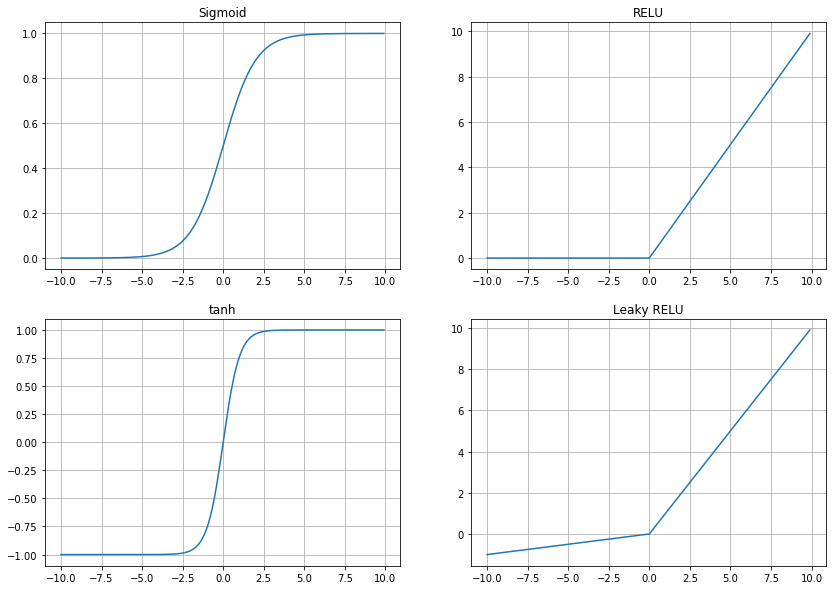

In [3]:
x_var = np.arange(-10,10,0.1)
fig = plt.figure(figsize=(14,10))
# fig.subplots_adjust(hspace=2, wspace=1)
ax = fig.add_subplot(2, 2, 1)
ax.plot(x_var,sigmoid(x_var))
ax.set_title('Sigmoid')
ax.grid()

ax = fig.add_subplot(2, 2, 2)
ax.plot(x_var,RELU(x_var))
ax.set_title('RELU')
ax.grid()

ax = fig.add_subplot(2, 2, 3)
ax.plot(x_var,tanh(x_var))
ax.set_title('tanh')
ax.grid()

ax = fig.add_subplot(2, 2, 4)
ax.plot(x_var,leakyRELU(x_var))
ax.set_title('Leaky RELU')
ax.grid()

## 5. Python Class Implementation <a class="anchor" id="python_class"></a>

Inorder to implement the Dense deep learning neural network for binary classification, extensive use of python dictionaries and numpy arrays were made. A python class which has the appropriate data structures (dictionaries) and functions makes it convenient to code the algorithm.

### 5.1 Data Structure (Dictionary) definitions <a class="anchor" id="python_class1"></a>

The following are the dictionaries defined in the python class
1. A overall architecture dictionary stores information about number of nodes in each layer and the activation function stored as a string in each layer. This dictionary is input by the user using a function called add_layer. The structure of the dictionary is given below.Python Dictionary which holds the overall architecture of the Neural Network is given below,

#### Neural Network Architecture <br>
*{<br>
 Layer 1: [Number of Nodes n1, Activation Function of Layer 1], <br>
 Layer 2: [Number of Nodes n2, Activation Function of Layer 2], <br>
 . <br>
 . <br>
 Layer L: [Number of Nodes nL, Activation Function of Layer L] <br>
}*

2. The parameters $W,b$, the activations $Z$ and $A$, and all the derivatives $dW, db, dA. dZ$  are defined as python dictionaries. The key to the dictionary is the layer index. The general structure of all the data dictionaries is as shown below,

#### Weights & Derivatives of the Weights <br>
*{<br>
Layer 1: np.array(n1,n0), <br>
Layer 2: np.array(n2,n1),<br>
.<br>
.<br>
Layer L: np.array(nL,nL-1)<br>
}*<br>

#### Biases & Derivatives of the Biases <br>
*{<br>
Layer 1: np.array(n1,1), <br>
Layer 2: np.array(n2,1),<br>
.<br>
.<br>
Layer L: np.array(nL,1)<br>
}*<br>

#### Z & A Activations <br>

Activations <br>
*{<br>
Layer 1: np.array(n1,m), <br>
Layer 2: np.array(n2,m),<br>
.<br>
.<br>
Layer L: np.array(nL,m)<br>
}*<br>

### 5.2 Member Functions  <a class="anchor" id="python_class2"></a>

There are many member functions defined in the class to enable sequential population of the data structures with data and implementation of gradient descent through forward and backward propagations. 
1. *input_data* - Ingests and scales the features and stores the response in appropriate arrays
2. *add_layer* - Function for adding layers to the neural network architecture. Takes 2 argument viz., no. of nodes in each layer and the activation function for the layer. The choices for the activation functions are *sigmoid, tanh, RELU and leakyRELU*
3. *nn_compile* - This function tries to mimic the compilation step used in the TensorFlow except here there is no actual compilation , but initialization of all the weight (random) and bias matrices. 
4. *fit* -  This function incorporates the forward and backward propagation of the gradient descent algorithm.It takes in number of epochs (number of iterations of gradient descent) and a learning rate
The python class definition is shown below. The inputs and output are similar to TensorFlow Keras API.

### 5.3 Code Listing <a class="anchor" id="python_class3"></a>

In [ ]:
class dense_NN():
    def __init__(self):
        np.random.seed(1)
        self.nn_struct={}
        self.index = int(0)
        self.W = {}
        self.b = {}
        self.Z = {}
        self.A = {}
        self.dA = {}
        self.dZ = {}
        self.dW = {}
        self.dB = {}
        #self.cost = []
        self.cost_list=np.array([])
    
    ###################Scaler###################
    def scaler_fit(self,X):
        self.X_max = X.max(0)
        self.X_min = X.min(0)
            
    def scaler_transform(self,X):
        return (X-self.X_min)/(self.X_max-self.X_min)
    
    ############################################
    
    #################Activation functions & derivatives###################
    ############Activation Functions############
    def sigmoid(self,x):
        return 1/(1+np.exp(-x))
    
    def RELU(self,x):
        return np.maximum(0,x)
    
    def tanh(self,x):
        return np.tanh(x)
    
    def leakyRELU(self,x):
        return np.maximum(0.01*x,x)
    
    #############Derivatives#####################
    def dsigmoid(self,X):
        return self.sigmoid(X)*(1-self.sigmoid(X))
    
    def dRELU(self,x):
        return np.where(x>=0.0,1,0)   
    
    def dtanh(self,X):
        return (1-np.square(np.tanh(X)))
    
    def dleakyRELU(self,x):
        return np.where(x>=0,0.01,1.0)
    
    ##############################################
    
    def g(self,X,fun="RELU"):
        if fun=="RELU":
            return self.RELU(X)
        if fun=="tanh":
            return self.tanh(X)
        if fun=='sigmoid':
            return self.sigmoid(X)
        if fun=='leakyRELU':
            return self.leakyRELU(X)
    
    def g_prime(self,X,fun="RELU"):
        if fun=="RELU":
            return self.dRELU(X)
        if fun=="tanh":
            return self.dtanh(X)
        if fun=='sigmoid':
            return self.dsigmoid(X)
        if fun=='leakyRELU':
            return self.dleakyRELU(X)
    ####################################################################################
    
    ################################Cost Function########################################
    def cost(self,y_true,y_pred):
        m = y_true.shape[1]
        return -np.sum(np.multiply(y_true,np.log(y_pred))+np.multiply((1-y_true),np.log(1-y_pred)))/m
    
    #####################################################################################
           
    def input_data(self,X,y):
        self.scaler_fit(X)
        X_scaled = self.scaler_transform(X)
        self.X = X_scaled
        self.y = y.reshape((1,-1))
        self.m = X_scaled.T.shape[1]
        self.n0 = X_scaled.shape[1]
        self.A.update({0:self.X.T})

    def add_layer(self,nodes=5,act_fun='RELU'):
        self.index += 1
        add_lay = {self.index:[nodes,act_fun]}
        self.nn_struct.update(add_lay)
        
    def summary(self):
        for key,value in sorted(self.nn_struct.items()):
            print("Layer:",key," Node Count:",value[0]," Activation Function:",value[1])
    
    ######################## Randomize the weight arrays#######################
    def nn_compile(self):
        self.L = max(sorted(self.nn_struct))
        for key,value in sorted(self.nn_struct.items()):
            if(key==1):
                W = 0.02*np.random.rand(value[0],self.n0)
                b = np.zeros((value[0],1))
                self.W.update({key:W})
                self.b.update({key:b})
            else:
                W = 0.02*np.random.rand(value[0],self.nn_struct[key-1][0])
                b = np.zeros((value[0],1))
                self.W.update({key:W})
                self.b.update({key:b})
    ###########################################################################
    
    def forward_prop(self,verbose=False):
        L = max(sorted(self.nn_struct))
        ##############Forward Propagation###############
        for key,value in sorted(self.nn_struct.items()):
            if(key==1):
                Z = np.dot(self.W[key],self.X.T)+self.b[key]
                A = self.g(Z,fun=value[1])
            else:
                Z = np.dot(self.W[key],self.A[key-1])+self.b[key]
                A = self.g(Z,fun=value[1])
            self.Z.update({key:Z})
            self.A.update({key:A})
        ################################################
        cost = self.cost(self.y,self.A[L])
        self.cost_list = np.append(self.cost_list,cost)
        i=len(self.cost_list)
        if verbose:
            print("Epoch: ",i,"Cross Entropy Cost: ",cost)
    
    def back_prop(self):
        ############### Total Number of Layers based on Input###########
        L = max(sorted(self.nn_struct))
        ###############Back Propagation #################
        dAL = - (np.divide(self.y, self.A[L]) - np.divide(1 - self.y, 1 - self.A[L]))
        dZ = dAL*self.g_prime(self.Z[L],fun=self.nn_struct[L][1])
        dW = np.dot(dZ,self.A[L-1].T)/self.m
        dB = np.sum(dZ,axis=1,keepdims=True)/self.m
        dAL_1 =  np.dot(self.W[L].T,dZ)
        
        self.dA.update({L:dAL})
        self.dZ.update({L:dZ})
        self.dW.update({L:dW})
        self.dB.update({L:dB})
        self.dA.update({L-1:dAL_1})
        
        
        for i in range(L-1,0,-1):
            dZ = self.dA[i]*self.g_prime(self.Z[i],fun=self.nn_struct[i][1])
            dW = np.dot(dZ,self.A[i-1].T)/self.m
            dB = np.sum(dZ,axis=1,keepdims=True)/self.m                    
            dAL_1 = np.dot(self.W[i].T,dZ)
            if(i!=1):
                self.dA.update({i-1:dAL_1})
            self.dZ.update({i:dZ})
            self.dW.update({i:dW})
            self.dB.update({i:dB})
         
        for i in range(1,L+1,1):
            self.W[i]=self.W[i]-self.alpha*self.dW[i]
            self.b[i]=self.b[i]-self.alpha*self.dB[i]
    
    def fit(self,alpha=0.01,epochs=100,verbose=False):
        self.alpha = alpha
        for i in range(1,epochs):
            self.forward_prop(verbose)
            if np.isnan(self.cost_list[i-1]):
                break
            self.back_prop()
    
    def predict(self,X_new):
        L = max(sorted(self.nn_struct))
        X_scaled = self.scaler_transform(X_new)
        m = X_new.shape[0]
        A_dict = {}
        Z_dict = {}
        for key,value in sorted(self.nn_struct.items()):
            if(key==1):
                Z = np.dot(self.W[key], X_scaled.T)+self.b[key]
                A = self.g(Z,fun=value[1])
            else:
                Z = np.dot(self.W[key],A_dict[key-1])+self.b[key]
                A = self.g(Z,fun=value[1])
            Z_dict.update({key:Z})
            A_dict.update({key:A})
        y_pred = A_dict[L].reshape(-1)
        y_class = np.zeros(m)
        y_class[y_pred>0.5]=1
        
        return y_pred,y_class
        

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import seaborn as sns

In [ ]:
def encoding(x):
    if x=='Yes':
        return int(1)
    else:
        return int(0)

df = pd.read_csv('Default.csv')
df['student_new'] = 0
df['default_new'] = 0

df['student_new']=df['student'].apply(encoding)
df['default_new'] = df['default'].apply(encoding)
df =df.drop(labels=['default','student'],axis=1)
df.head()
df_X = df.drop(labels=['default_new'],axis=1)
df_y = df['default_new']
X = df_X.to_numpy()
y = df['default_new'].to_numpy()
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=50,stratify=y)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [ ]:
nn1 = dense_NN()
nn1.input_data(X_train,y_train)
#nn1.add_layer(nodes=20,act_fun='tanh')
nn1.add_layer(15,act_fun='leakyRELU')
# nn1.add_layer(11,act_fun='RELU')
# nn1.add_layer(12,act_fun='RELU')
# nn1.add_layer(13,act_fun='RELU')
nn1.add_layer(1,act_fun='sigmoid')
#nn1.summary()
nn1.nn_compile()

In [ ]:
nn1.fit(alpha=0.1,epochs=2000,verbose=True)

In [ ]:
plt.figure()
plt.plot(nn1.cost_list)
plt.show()

In [ ]:
y_prob,y_class = nn1.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_class)

In [ ]:
print(classification_report(y_test,y_class))

In [ ]:
print("Weights W:\n")
for key,value in sorted(nn1.W.items()):
    print(value.shape)
print("\n")
print("Intercept b:\n")
for key,value in sorted(nn1.b.items()):
    print(value.shape)
print("\n")    
print("dWeights dW:\n")
for key,value in sorted(nn1.dW.items()):
    print(value.shape)
print("\n")

print("dIntercept dB:\n")
for key,value in sorted(nn1.dB.items()):
    print(value.shape)
print("\n")

print("A:\n")
for key,value in sorted(nn1.A.items()):
    print(value.shape)
print("\n")

print("dA:\n")
for key,value in sorted(nn1.dA.items()):
    print(value.shape)
print("\n")